In [1]:
#################################################
#created the 19/04/2018 12:57 by Alexis Blanchet#
#################################################
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
from pandas import DataFrame
from pandas import concat
import random
import os


In [2]:
df = pd.read_csv('sfrdaily_20171201_20180103195618_60.csv',sep=';')

In [3]:
df.head()

,IDCST,DPT,IDCIBLE,1,2,3,4,5,6,7,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,192,99,1,197208,197384,199640,206360,207811,205545,205147,...,359269,353724,350598,337250,340802,346253,347155,342388,344689,341451
1,192,99,2,29947,30088,30088,30241,30573,31072,32759,...,45259,46819,45860,45132,45796,47841,46320,46001,45707,44160
2,192,99,3,32990,34704,36504,37089,35333,36005,31992,...,38629,39042,36005,34096,35896,36178,37567,34812,34074,34400
3,192,99,4,17337,18525,17532,17746,17570,17200,18661,...,31245,29862,29999,28771,27525,31849,31051,30408,31206,32940
4,192,99,5,116933,114066,115516,121283,124333,121266,121733,...,244133,238000,238733,229250,231583,230383,232216,231166,233700,229950


In [4]:
df.shape

(136068, 1443)

In [5]:
df2 = df.loc[df["IDCST"]== 192]
df2 = df2.loc[df2["DPT"]== 0]
df2.shape

(5, 1443)

In [6]:
df2 = df.sum(axis = 0)/100

In [7]:
df2.shape

(1443,)

In [8]:
df2 = df2.drop(["IDCST","DPT","IDCIBLE"])

In [9]:
df2.to_csv("clean_data_test.csv",header=['values'])

/home/alexis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/home/alexis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


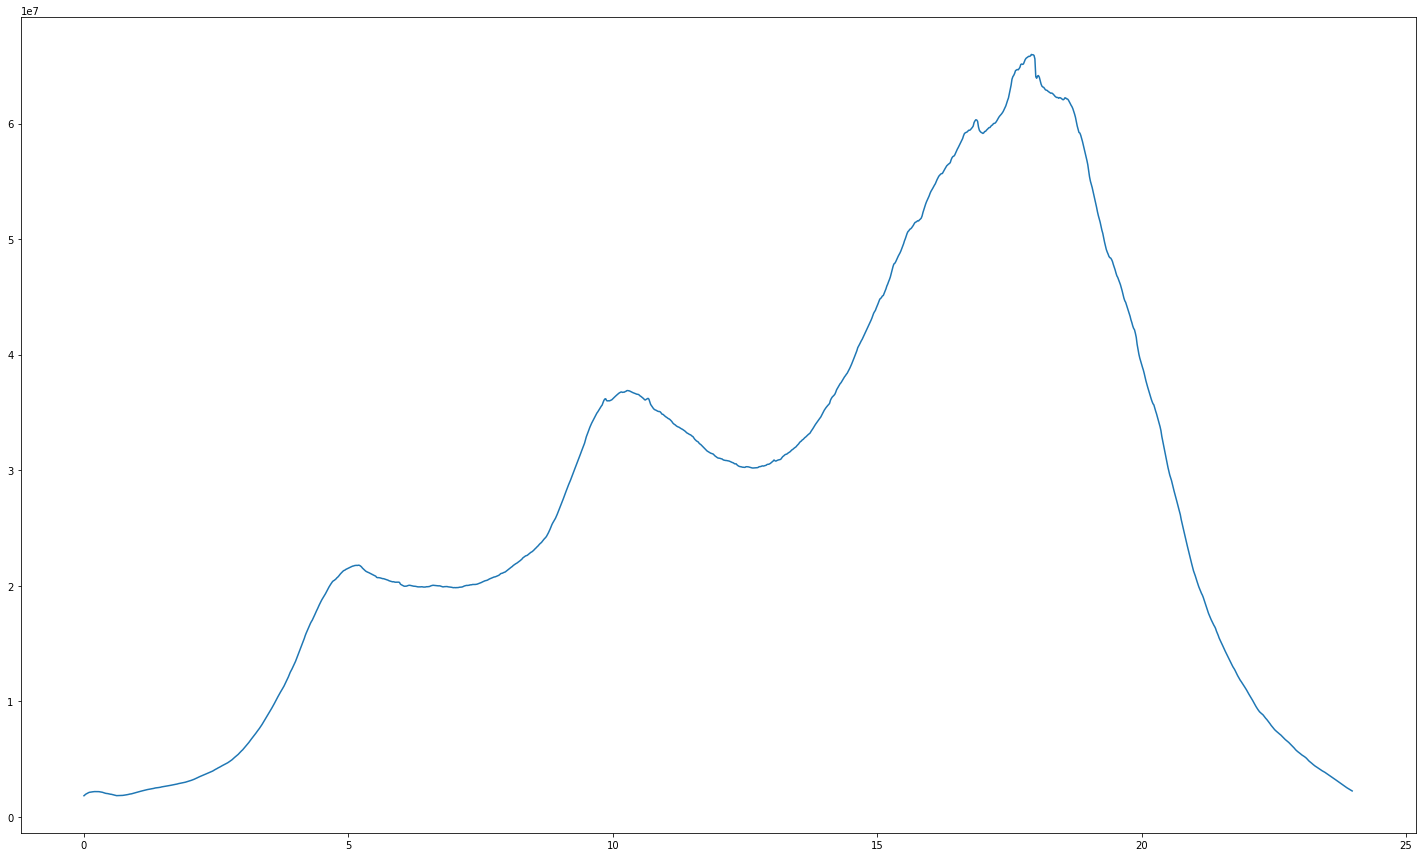

In [13]:
import matplotlib
y = df2.values
x = [i/60 for i in range(len(y))]
xp = np.linspace(-0.1,24.1,100)
p  = np.poly1d(np.polyfit(x, y, 20))
p50  = np.poly1d(np.polyfit(x, y, 50))
plt.figure(figsize=(25,15))
_ = plt.plot(x, y)#, '.', xp, p(xp), '-', xp, p50(xp), '--')
plt.savefig('test.png')
plt.show()


In [71]:
import plotly.offline as offline
import plotly.graph_objs as go

offline.plot({'data': [{'y': x,'x':[i/60 for i in range(len(x))]}], 
               'layout': {'title': 'Test Plot', 
                          'font': dict(size=16)}},
             image='png')

'file:///home/alexis/Bureau/Project/datas/time series/temp-plot.html'